<a href="https://colab.research.google.com/github/C1PO/Machine_learning/blob/main/cognition%26computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# carica il dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[:30000]
x_test = x_test[:30000]
y_train = y_train[:30000]
y_test = y_test[:30000]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
y_train.shape

(30000, 1)

In [ ]:
print(y_train[0])

[6]


In [ ]:
from keras.utils import to_categorical, plot_model

# converti le etichette di training in formato one-hot encoding
y_train = to_categorical(y_train, num_classes=10)

# converti le etichette di test in formato one-hot encoding
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
print("The number of samples of the training set is", x_train.shape[0])
print("The number of samples of the test set is", x_test.shape[0])

The number of samples of the training set is 30000
The number of samples of the test set is 10000


In [ ]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

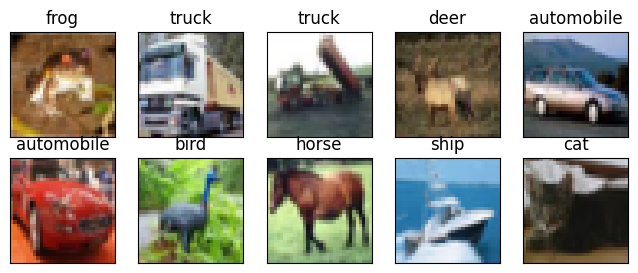

In [ ]:
# plotting the first 10 images of the training set
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(labels[np.argmax(y_train[i])])
plt.show()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(30000, 32, 32, 3)
(30000, 10)


## Define the model

In [ ]:
from os import name
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:], name='conv_1'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), name='conv_2'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), name='conv_3'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), name='conv_4'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), name='conv_5'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), name='conv_6'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(Conv2D(32,(3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Conv2D(64, (3,3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

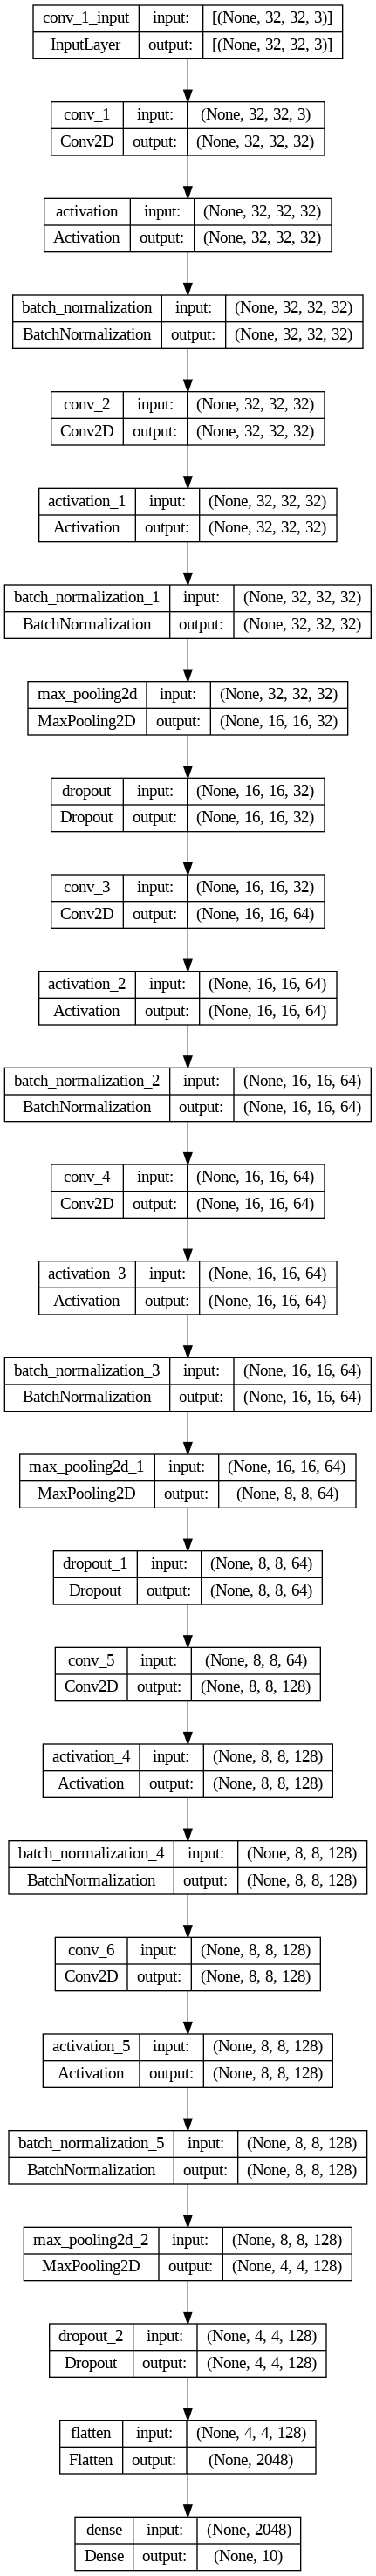

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
188/188 [==============================] - 25s 21ms/step - loss: 1.8377 - accuracy: 0.3191 - val_loss: 1.5633 - val_accuracy: 0.4350
Epoch 2/30
188/188 [==============================] - 3s 13ms/step - loss: 1.4646 - accuracy: 0.4646 - val_loss: 1.2810 - val_accuracy: 0.5290
Epoch 3/30
188/188 [==============================] - 2s 13ms/step - loss: 1.2937 - accuracy: 0.5315 - val_loss: 1.1377 - val_accuracy: 0.5887
Epoch 4/30
188/188 [==============================] - 3s 14ms/step - loss: 1.1721 - accuracy: 0.5808 - val_loss: 1.0493 - val_accuracy: 0.6250
Epoch 5/30
188/188 [==============================] - 2s 13ms/step - loss: 1.0790 - accuracy: 0.6168 - val_loss: 0.9943 - val_accuracy: 0.6440
Epoch 6/30
188/188 [==============================] - 3s 13ms/step - loss: 1.0024 - accuracy: 0.6430 - val_loss: 0.9580 - val_accuracy: 0.6613
Epoch 7/30
188/188 [==============================] - 2s 13ms/step - loss: 0.9467 - accuracy: 0.6659 - val_loss: 0.8803 - val_accuracy: 0.694

In [ ]:
test_loss, test_acc = cnn.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.8476 - accuracy: 0.7466 - 1s/epoch - 4ms/step


In [ ]:
def plot_accuracy():
  plt.figure(figsize=(8,5))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

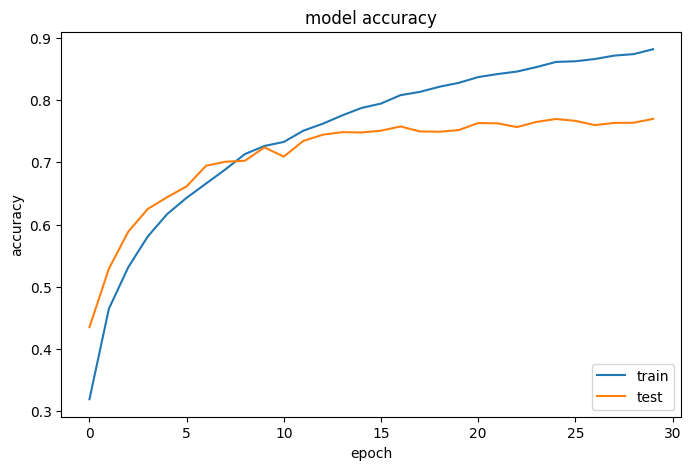

In [ ]:
plot_accuracy()

In [ ]:
def plot_errors():
  plt.figure(figsize=(8,5))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

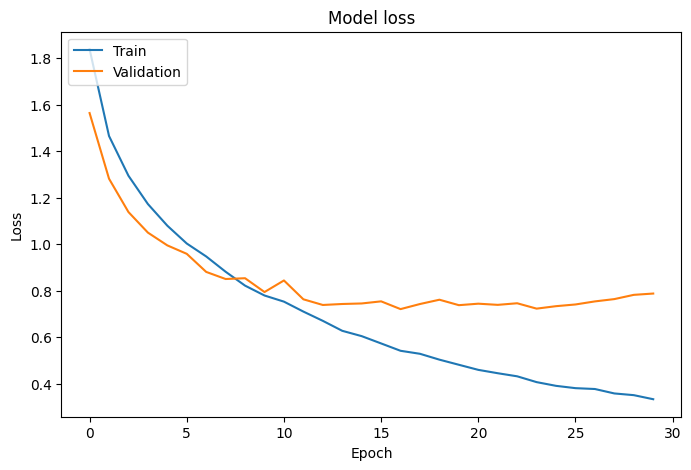

In [ ]:
plot_errors()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import plotly.figure_factory as ff

y_pred = cnn.predict(x_test)

# converte le etichette di classe dal formato one-hot encoding a formato interi
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# calcola l'accuratezza e la matrice di confusione
cm = confusion_matrix(y_test_int, y_pred_int)

fig = ff.create_annotated_heatmap(z=np.array(cm), colorscale='Blues')
fig.update_layout(title='Confusion Matrix')
fig.show()

313/313 [==============================] - 1s 2ms/step


## Linear read out

In [ ]:
from tensorflow.keras.models import Model

conv2_model = Model(inputs=cnn.input, outputs=cnn.get_layer('conv2d_2').output)
conv3_model = Model(inputs=cnn.input, outputs=cnn.get_layer('conv2d_3').output)
dense_model = Model(inputs=cnn.input, outputs=cnn.get_layer('dense_1').output)

In [ ]:
conv2_output = conv2_model.predict(x_train)

938/938 [==============================] - 2s 2ms/step


In [ ]:
conv3_output = conv3_model.predict(x_train)

938/938 [==============================] - 2s 2ms/step


In [ ]:
dense_output = dense_model.predict(x_train)

938/938 [==============================] - 2s 2ms/step


In [ ]:
#Class used to initialize a linear model given the hidden representation
class LinearModel(tf.keras.Model):
  def __init__(self, layer_size, n_units=10):
    super().__init__()
    # Create a dense layer with 10 neurons and input shape equal to layer size.
    self.linear = tf.keras.layers.Dense(10, input_shape=(layer_size,), activation='linear')
  # Override the call method to define the forward pass of the model.
  def call(self, x):
    return self.linear(x)

In [ ]:
layer_size = cnn.get_layer(name='conv2d_2').input_shape[1]
linear_conv2 = LinearModel(layer_size)

layer_size = cnn.get_layer(name='conv2d_3').input_shape[1]
linear_conv3 = LinearModel(layer_size)

layer_size = cnn.get_layer(name='dense_1').input_shape[1]
linear_dense = LinearModel(layer_size)

In [ ]:
def train_linear_readout(linear_readout, hidden_reprs, targets, layer_type='conv', epochs=500):
  # Define the optimizer and loss function.
  optimizer = tf.keras.optimizers.Adam()
  computed_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  #Store the computed loss in each epoch into an array
  loss_history=[]
  # Compile the linear readout
  linear_readout.compile(optimizer=optimizer, loss=computed_loss)

  for epoch in range(epochs):
    with tf.GradientTape() as tape:
      # Make predictions 
      predictions = linear_readout(hidden_reprs)
      if layer_type == 'conv':
        # Extract the first element in order to obtain a tensor of appropriate dimension
        predictions_decoded = predictions[:, 0, 0]
      elif layer_type == 'dense':
        predictions_decoded = predictions

      #Compute the loss
      loss = computed_loss(targets, predictions_decoded)
    loss_history.append(loss)
    # Compute the gradients
    gradient = tape.gradient(loss, linear_readout.trainable_variables)
    # Apply the gradien
    optimizer.apply_gradients(zip(gradient, linear_readout.trainable_variables))

    if epoch % 50 == 0:
      print("epoch: {:3d}/{}, loss = {:.4f}".format(epoch + 1, epochs, loss.numpy()))
  print("epoch: {:3d}/{}, loss = {:.4f}".format(500, epochs, loss_history[499].numpy()))
  return loss_history

In [ ]:
third_conv2D_readout = train_linear_readout(linear_conv2, conv2_output,y_train,layer_type='conv')


ValueError: ignored

##PYTORCH

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 92606897.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


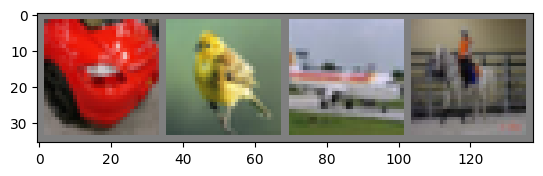

car   bird  plane horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd2998c3550>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fd2998c3550>Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
self._shutdown_workers()    
self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
if w.is_alive():  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive

    assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in 

[1,  2000] loss: 1.044
[1,  4000] loss: 1.031
[1,  6000] loss: 1.046
[1,  8000] loss: 1.044
[1, 10000] loss: 1.044
[1, 12000] loss: 1.036
Finished Training


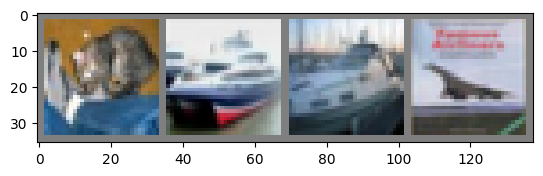

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %
